# TASK 1

# TITANIC SURVIVAL PREDICTION

## Data Acquisition

In [2]:
import pandas as pd
import numpy as np
# read dataset
df = pd.read_csv("tested.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [2]:
#describe dataset
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


## Handle Null Values

In [4]:
#check null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
#fill Null value of age with mean of age bcz numerical data
mean_age = df['Age'].mean()
df['Age'].fillna(mean_age, inplace=True)

In [7]:
#fill Null value of Fare with mean of Fare bcz numerical data
mean_age = df['Fare'].mean()
df['Fare'].fillna(mean_age, inplace=True)

In [8]:
#Fill cabin with mode of cabin because it catagorical data
cabin_mode = df['Cabin'].mode()[0]
df['Cabin'].fillna(cabin_mode,inplace = True)

In [9]:
#convert float to int the age because age is not in int
df['Age'] = df['Age'].round().astype(int)
# Convert 'Age' column from float32 to int
df['Age'] = df['Age'].astype(int)


In [10]:
# after imutation 
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## Handling Outliers

## Before Removing Outliers

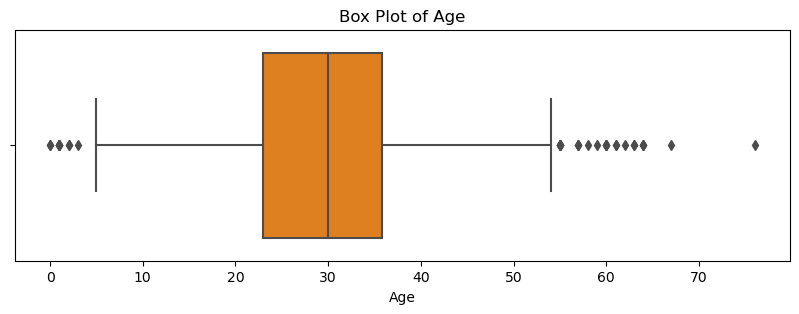

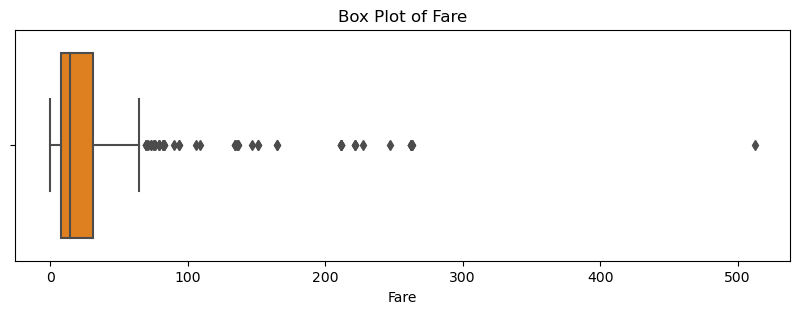

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Identify numeric columns
numeric_columns = ['Age', 'Fare']

# Age box plot
plt.figure(figsize=(10, 3))
sns.boxplot(x='Age', data=df, palette="autumn")
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.show()

# Fare boxplot
plt.figure(figsize=(10, 3))
sns.boxplot(x='Fare', data=df, palette="autumn")
plt.title('Box Plot of Fare')
plt.xlabel('Fare')
plt.show()


In [12]:
# Remove outliers
for column in numeric_columns:
    # Calculate percentiles
    q25, q75 = df[column].quantile(0.25), df[column].quantile(0.75)
    # Calculate the IQR
    iqr = q75 - q25
    # outlier cutoff
    cutoff = 1.5 * iqr
    # Identify outliers
    outliers = df[(df[column] < q25 - cutoff) | (df[column] > q75 + cutoff)]
    # Remove outliers
    df = df[~df.index.isin(outliers.index)]


## After Removing Outliers

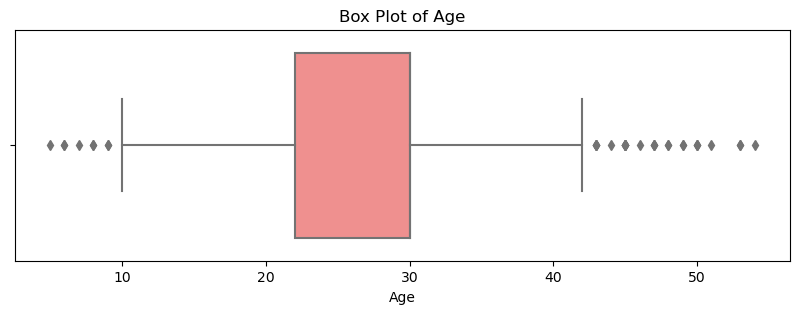

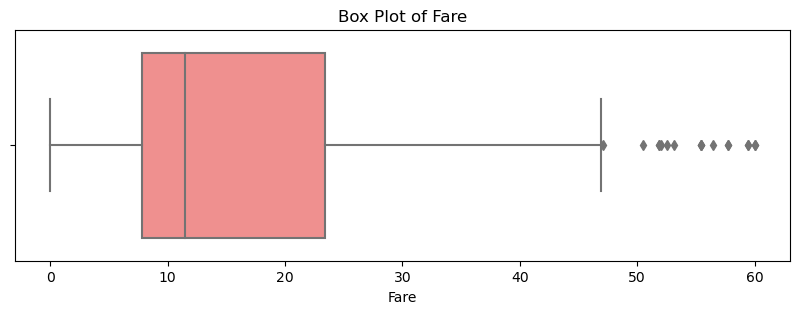

In [13]:
# Ater Age boxplot
plt.figure(figsize=(10, 3))
sns.boxplot(x='Age', data=df, palette="spring")
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.show()

# After Fare boxplot
plt.figure(figsize=(10, 3))
sns.boxplot(x='Fare', data=df, palette="spring")
plt.title('Box Plot of Fare')
plt.xlabel('Fare')
plt.show()

# Count of Gender

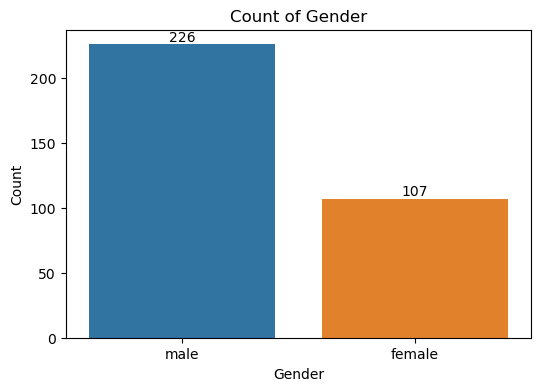

In [14]:
# Count of gender
gender_counts = df['Sex'].value_counts()

# Visualize gender counts
plt.figure(figsize=(6, 4))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="tab10")
plt.title('Count of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Add annotations
for x, y in enumerate(gender_counts.values):
    plt.text(x, y, f'{y}', ha='center', va='bottom')

plt.show()

# Count of Survived 

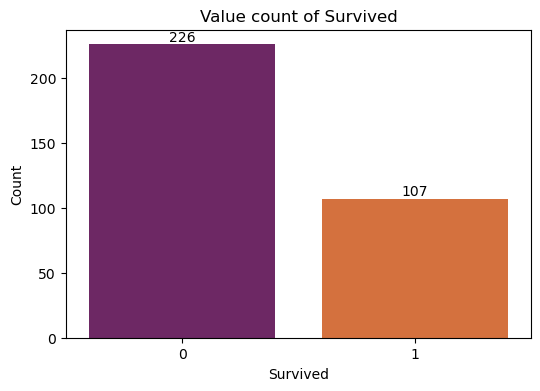

In [15]:
# Value count of 'Survived' column
survived_counts = df['Survived'].value_counts()

# Visualize 'Survived' counts
plt.figure(figsize=(6, 4))
sns.barplot(x=survived_counts.index, y=survived_counts.values, palette="inferno")
plt.title('Value count of Survived')
plt.xlabel('Survived')
plt.ylabel('Count')

# Add annotations
for index, value in enumerate(survived_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

# Gender Based survial

<Figure size 800x600 with 0 Axes>

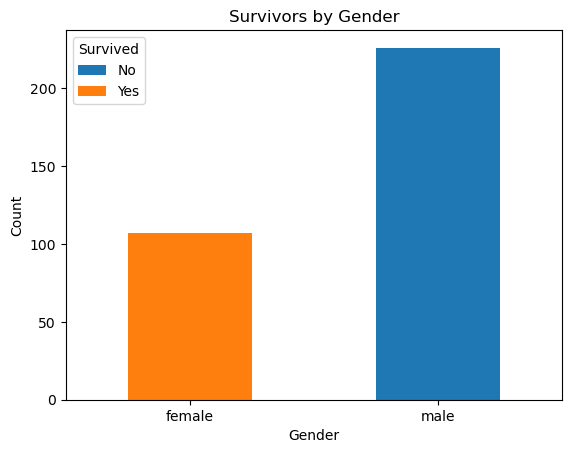

In [16]:
# Calculate the count of survivors by gender
survived_gender = df.groupby(['Sex', 'Survived']).size().unstack()

# Visualize survivors by gender using a vertical bar plot
plt.figure(figsize=(8, 6))
survived_gender.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])
plt.title('Survivors by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.xticks(rotation=0)  # Rotate x-axis labels to prevent overlap
plt.show()


# Implement the model

# Random Forest model

### Why Random Forest Model?


#### 1: Handling Categorical Variables 2: Non-linear Relationships 3: Robustness to Overfitting 3:Feature Importance 4: Easy Implementation and Tuning

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Drop non-numeric columns
X = df.drop(['Survived', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)

# Encode variable  
label_encoder = LabelEncoder()
X['Sex'] = label_encoder.fit_transform(X['Sex'])

# Split the data into features and target variable
y = df['Survived']

# training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        22

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



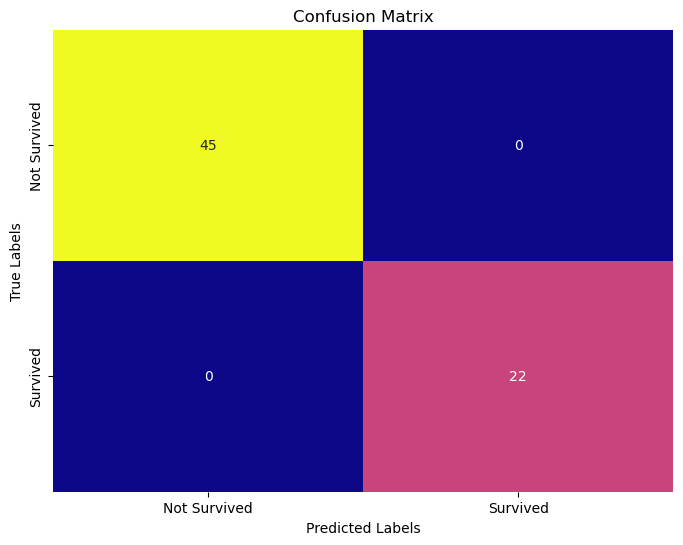

In [18]:
from sklearn.metrics import confusion_matrix

# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot 
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='plasma', cbar=False, 
            xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Actual Survival Count

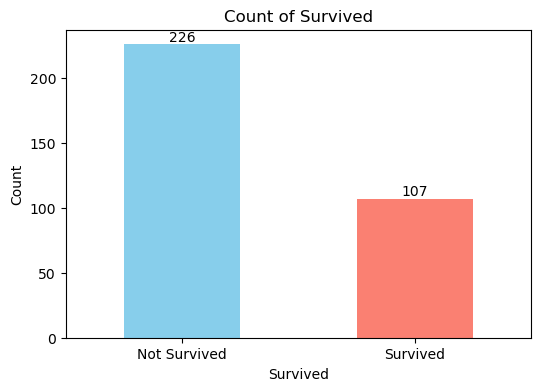

In [19]:
count= df['Survived'].value_counts()


# Plot the counts using a bar plot
plt.figure(figsize=(6, 4))
bars = count.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Count of Survived')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Survived', 'Survived'], rotation=0)

# Add annotations to the bars
for index, value in enumerate(count):
    plt.annotate(str(value), xy=(index, value), ha='center', va='bottom')

plt.show()

# Comparison

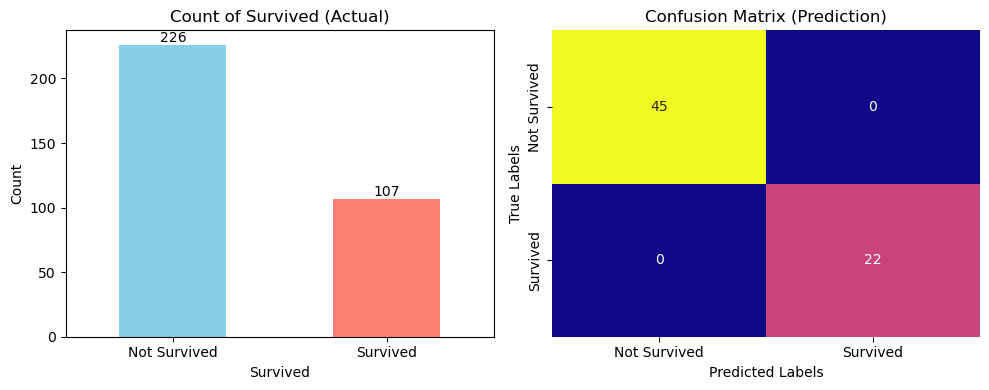

In [20]:
plt.figure(figsize=(10, 4))

# Plot of actual survival counts
plt.subplot(1, 2, 1)
bars = count.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Count of Survived (Actual)')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Survived', 'Survived'], rotation=0)

# Add annotations to the bars
for index, value in enumerate(count):
    plt.annotate(str(value), xy=(index, value), ha='center', va='bottom')


# Plot of confusion matrix
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='plasma', cbar=False, 
            xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix (Prediction)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.tight_layout()
plt.show()

In [21]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34,0,0,330911,7.8292,B57 B59 B63 B66,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7.0000,B57 B59 B63 B66,S
3,895,0,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,B57 B59 B63 B66,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,B57 B59 B63 B66,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14,0,0,7538,9.2250,B57 B59 B63 B66,S
...,...,...,...,...,...,...,...,...,...,...,...,...
412,1304,1,3,"Henriksson, Miss. Jenny Lovisa",female,28,0,0,347086,7.7750,B57 B59 B63 B66,S
413,1305,0,3,"Spector, Mr. Woolf",male,30,0,0,A.5. 3236,8.0500,B57 B59 B63 B66,S
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38,0,0,SOTON/O.Q. 3101262,7.2500,B57 B59 B63 B66,S
416,1308,0,3,"Ware, Mr. Frederick",male,30,0,0,359309,8.0500,B57 B59 B63 B66,S


In [22]:
df.to_csv('preprocessed_data.csv', index=False)

In [3]:
df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Citations

In [ ]:
# 1: I help from geeksforgeeks for the EDA part 
#Link: https://www.geeksforgeeks.org/data-preprocessing-analysis-and-visualization-for-building-a-machine-learning-model/
# 2: I help from stackoverflow for multiple bugs and errors
# 3: I help from Open AI for the understanding and clearning concepts